In [1]:
# Importing necessary libraries
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from textblob import TextBlob

In [ ]:
# Reading the dataset
df = pd.read_csv('Your_file_name.csv')
print(df.head())

In [10]:
# Cleaning the data by dropping N/A for the year 2020
df['Response-2020'].dropna().to_csv('cleaned_response-2020.csv', index = False)

In [ ]:
df_2020 = pd.read_csv('cleaned_response-2020.csv')
print(df_2020.head())

In [11]:
# Cleaning the data by dropping N/A for the year 2021
df['Response-2021'].dropna().to_csv('cleaned_response-2021.csv', index = False)

In [ ]:
df_2021 = pd.read_csv('cleaned_response-2021.csv')
print(df_2021.head())

In [14]:
# Function to remove numbers from text
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)

# Applying the function to remove numbers
df_2020['cleaned_data'] = df_2020['Response-2020'].apply(drop_numbers)
df_2021['cleaned_data'] = df_2021['Response-2021'].apply(drop_numbers)

In [19]:
# Function to convert text to lowercase
def lower_case(text):
    text_words = word_tokenize(text)
    text_words_lower = [x.lower() for x in text_words]
    return ' '.join(text_words_lower)

# Applying the function to convert text to lowercase
df_2020['cleaned_data'] = df_2020['cleaned_data'].apply(lower_case)
df_2021['cleaned_data'] = df_2021['cleaned_data'].apply(lower_case)

In [ ]:
# Setting up NLTK for lemmatization
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('wordnet')

In [23]:
from nltk.corpus import wordnet
# Function to get wordnet POS tag
def get_wordnet_pos(tag):
    """Map POS tag to first character lemmatize() accepts"""
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag[0].upper(), wordnet.NOUN)

lemmatizer = WordNetLemmatizer()

# Function for lemmatization
def lemmatise(text):
    text_tokens = word_tokenize(text)
    pos_tags = nltk.pos_tag(text_tokens)
    text_lemm = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tags]
    return ' '.join(text_lemm)

# Applying the function for lemmatization
df_2020['cleaned_data'] = df_2020['cleaned_data'].apply(lemmatise)
df_2021['cleaned_data'] = df_2021['cleaned_data'].apply(lemmatise)

In [26]:
# Function to remove stopwords
def remove_stopword(text):
    text_tokens = word_tokenize(text)
    tokens = [word for word in text_tokens if not word in set(stopwords.words('english'))]
    tokens_text = ' '.join(tokens)
    return tokens_text

# Applying the function to remove stopwords
df_2020['cleaned_data'] = df_2020['cleaned_data'].apply(remove_stopword)
df_2021['cleaned_data'] = df_2021['cleaned_data'].apply(remove_stopword)

In [29]:
# New Mapping: Function to map text to emotions based on sentiment analysis

def map_emotion(text):
    textblob = TextBlob(str(text))
    polarity = textblob.sentiment.polarity
    subjectivity = textblob.sentiment.subjectivity
    # Mapping emotions based on polarity and subjectivity
    if polarity > 0.7:
        emotion = "Love" if subjectivity > 0.6 else "Triumph"
    elif 0.5 < polarity <= 0.7:
        emotion = "Attraction" if subjectivity > 0.5 else "Excitement"
    elif 0.3 < polarity <= 0.5:
        emotion = "Interest" if subjectivity > 0.5 else "Gratitude"
    elif 0 < polarity <= 0.3:
        emotion = "Hope" if subjectivity > 0.5 else "Contentment"
    elif -0.3 < polarity < 0:
        emotion = "Frustration" if subjectivity > 0.5 else "Discontentment"
    elif -0.5 < polarity <= -0.3:
        emotion = "Sadness" if subjectivity > 0.5 else "Pride"
    elif -0.7 < polarity <= -0.5:
        emotion = "Fear" if subjectivity > 0.5 else "Aversion"
    elif polarity <= -0.7:
        emotion = "Hate" if subjectivity > 0.6 else "Dread"
    else:
        emotion = "Ambivalence" if subjectivity > 0.5 else "Objectivity"    
    return emotion

# Applying the function to map emotions
df_2020['emotion'] = df_2020['cleaned_data'].apply(map_emotion)
df_2021['emotion'] = df_2021['cleaned_data'].apply(map_emotion)


In [ ]:
# Counting the frequency of emotions
emotions_2020 = df_2020['emotion'].value_counts()
emotions_2020

In [ ]:
# Counting the frequency of emotions
emotions_2021 = df_2021['emotion'].value_counts()
emotions_2021

In [ ]:
df_2020.head()

In [80]:
# Old Mapping
# def map_emotion(text):
#     textblob = TextBlob(str(text))
#     polarity = textblob.sentiment.polarity
#     subjectivity = textblob.sentiment.subjectivity
#     if polarity > 0.6:
#         emotion = "Joy" if subjectivity > 0.5 else "Optimism"
#     elif 0.3 < polarity <= 0.6:
#         emotion = "Happiness" if subjectivity > 0.5 else "Satisfaction"
#     elif 0 < polarity <= 0.3:
#         emotion = "Hopefulness" if subjectivity > 0.5 else "Contentment"
#     elif -0.3 < polarity <= 0:
#         emotion = "Frustration" if subjectivity > 0.5 else "Discontent"
#     elif -0.6 < polarity <= -0.3:
#         emotion = "Sadness" if subjectivity > 0.5 else "Unhappiness"
#     elif polarity <= -0.6:
#         emotion = "Anger" if subjectivity > 0.5 else "Pessimism"
#     else:
#         emotion = "Ambivalence" if subjectivity > 0.5 else "Objectivity"
#     return emotion
    
# df['emotion'] = df['cleaned_data'].apply(map_emotion)

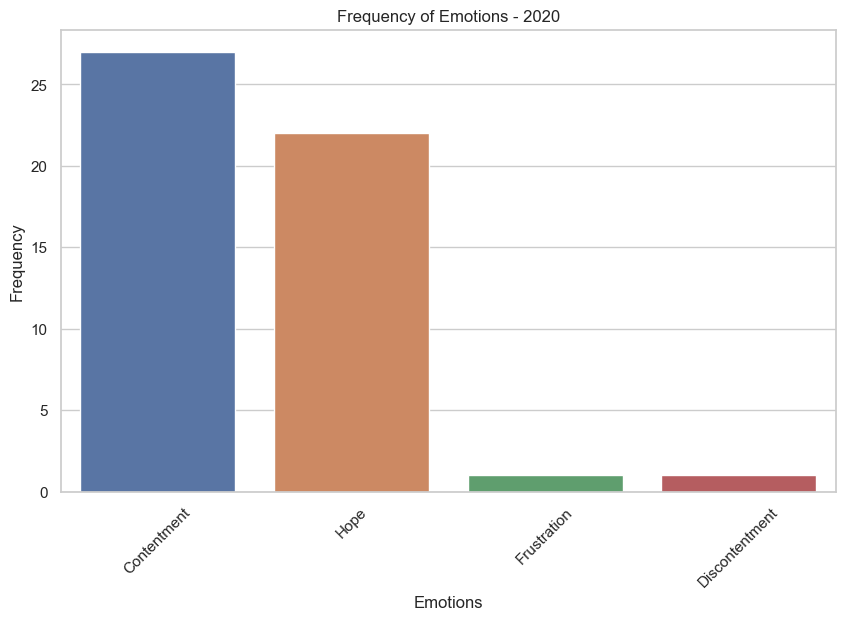

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting Seaborn style for Plotting the data
sns.set(style="whitegrid")

# Creating the bar plot for 2020 emotions
plt.figure(figsize=(10, 6))
sns.barplot(x=emotions_2020.index, y=emotions_2020.values)

plt.title('Frequency of Emotions - 2020')
plt.xlabel('Emotions')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

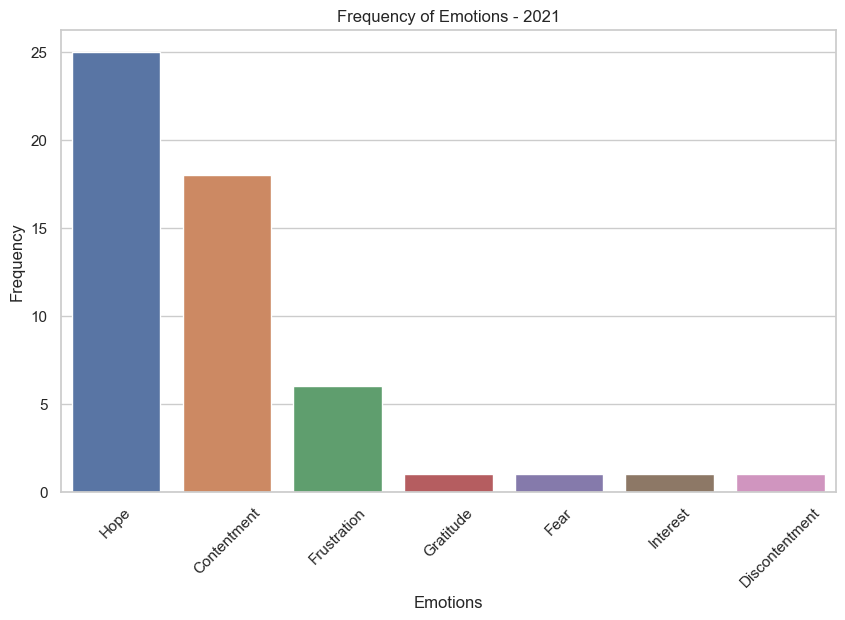

In [42]:
# Setting Seaborn style
sns.set(style="whitegrid")

# Creating the bar plot for 2021 emotions
plt.figure(figsize=(10, 6))
sns.barplot(x=emotions_2021.index, y=emotions_2021.values)

plt.title('Frequency of Emotions - 2021')
plt.xlabel('Emotions')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

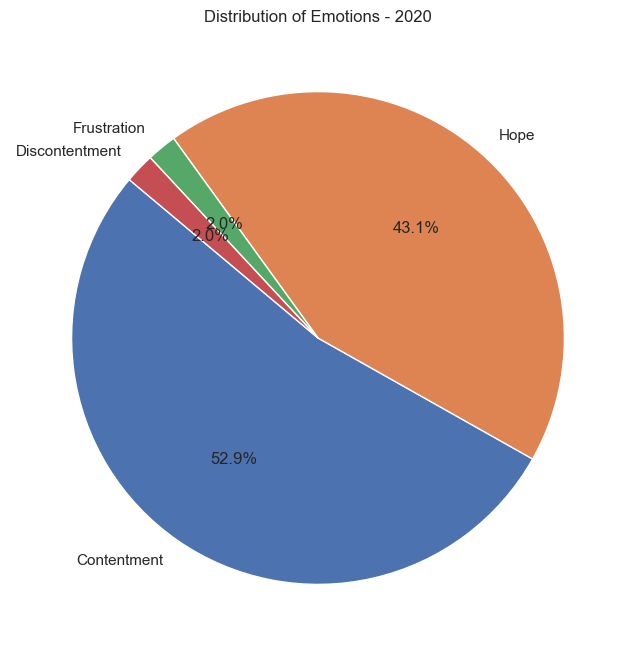

In [43]:
# Pie chart for 2020 emotions
plt.figure(figsize=(8, 8))
plt.pie(emotions_2020, labels=emotions_2020.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Emotions - 2020')
plt.show()

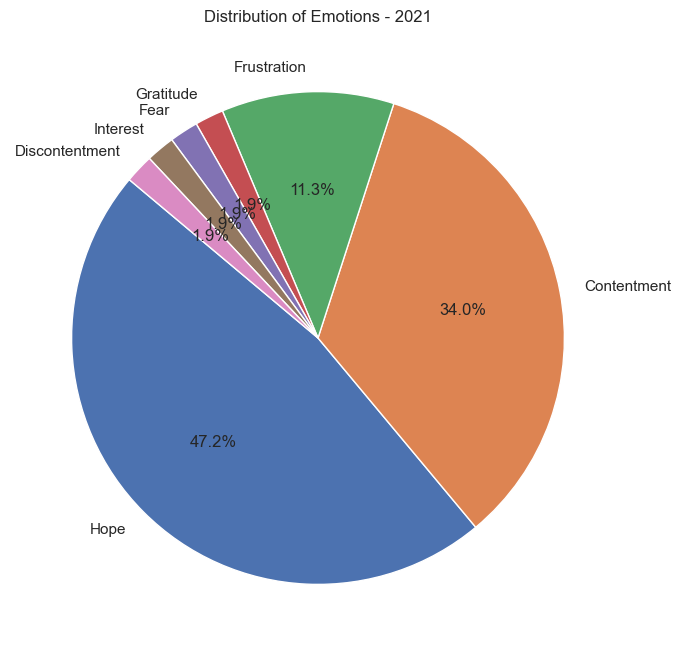

In [44]:
# Pie chart for 2021 emotions
plt.figure(figsize=(8, 8))
plt.pie(emotions_2021, labels=emotions_2021.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Emotions - 2021')
plt.show()